# Iniciativas legislativas publicadas entre 2009-2024

In [1]:
# Cargar las librerías necesarias
import pandas as pd
import pickle 
import os
import numpy as np
import sweetviz as sv
import webbrowser
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Configurar path
os.chdir('C://iamas_datos2024/proyectos_parlamentarios_2025/')
pd.set_option('display.max_colwidth', None)

In [3]:
# abrir el archivo binario proyecto filtrado
with open('proyecto_2009_2024_LIMPIO2_df.pkl', 'rb') as file:
    proyecto_2009_2024_df_LIMPIO = pickle.load(file)

In [5]:
proyecto_2009_2024_df_LIMPIO.shape

(97738, 21)

In [6]:
proyecto_2009_2024_df_LIMPIO.head(3)

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Exp..Diputados,Tipo,Max_Orden,Proyecto_girado_a_comisiones_SALUD,Proyecto_SALUD,Resultado,...,Duración_dias_prep,Años_mes,Año,Mes,Nombre_dia_semana,Tiempo_desde_public_anterior,Tiempo_desde_Proyecto.ID_anterior,ID,Diferencia_ID,Tiene_antecedente_por_titulo_proy
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",2024-12-23,HCDN142TP207,7465-D-2024,LEY,3,0.0,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,...,-1.0,2024-12,2024,12,Monday,0.0,0.0,280534,1.0,False
1,HCDN280537,"PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.",2024-12-23,HCDN142TP207,7464-D-2024,DECLARACION,3,0.0,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,...,-1.0,2024-12,2024,12,Monday,0.0,0.0,280537,1.0,False
2,HCDN280533,DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 SOBRE IMAGENES HUMANAS EN PUBLICIDADES.,2024-12-23,HCDN142TP207,7463-D-2024,LEY,1,0.0,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,...,-1.0,2024-12,2024,12,Monday,0.0,0.0,280533,1.0,False


In [7]:
proyecto_2009_2024_df_LIMPIO.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Proyecto.ID,97738,97738,HCDN102489,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Título,97738,94663,JUICIO POR JURADOS. CREACION.,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publicación.Fecha,97738,NaN,NaN,NaN,2016-07-30 11:22:33.766191104,2009-01-05 00:00:00,2012-09-13 06:00:00,2016-05-23 00:00:00,2020-05-27 00:00:00,2024-12-23 00:00:00,NaN
Publicación.ID,97041,3238,HCDN127TP001,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exp..Diputados,97738,97738,0001-D-2009,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo,97738,5,RESOLUCION,43994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_Orden,97738.0,NaN,NaN,NaN,1.557685,1.0,1.0,1.0,2.0,8.0,0.794144
Proyecto_girado_a_comisiones_SALUD,97738.0,NaN,NaN,NaN,0.107543,0.0,0.0,0.0,0.0,1.0,0.309803
Proyecto_SALUD,97738.0,NaN,NaN,NaN,0.08799,0.0,0.0,0.0,0.0,1.0,0.283282
Resultado,97738,7,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,84641,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ver por período parlamentario

In [8]:
# https://www2.hcdn.gob.ar/export/hcdn/secparl/dgral_info_parlamentaria/dip/archivos/Estadistica_leyes_83-23.pdf
d = {'Período' :[127,128,129,130,131,132,133,134,135,136,137,138,139,140,141],
     'Desde' : ['1/3/2009','1/3/2010','1/3/2011','1/3/2012', '1/3/2013','1/3/2014','1/3/2015','1/3/2016','1/3/2017','1/3/2018','1/3/2019','1/3/2020','1/3/2021','1/3/2022','1/3/2023'],
     'Hasta' : ['28/02/2010','28/02/2011','29/02/2012','28/02/2013','28/02/2014','28/02/2015','29/02/2016','28/02/2017','28/02/2018','28/02/2019', '29/02/2020', '28/02/2021', '28/02/2022','28/02/2023','29/02/2024']}

periodo_HCD_df = pd.DataFrame(d)

# Tipo fecha en python
periodo_HCD_df['Desde'] = pd.to_datetime(periodo_HCD_df['Desde'],  dayfirst=True ,errors='coerce')
periodo_HCD_df['Hasta'] = pd.to_datetime(periodo_HCD_df['Hasta'],  dayfirst=True ,errors='coerce')

# Mostrar
periodo_HCD_df.describe()

,Período,Desde,Hasta
count,15.000000,15,15
mean,134.000000,2016-02-29 14:24:00,2017-02-27 20:48:00
min,127.000000,2009-03-01 00:00:00,2010-02-28 00:00:00
25%,130.500000,2012-08-30 12:00:00,2013-08-29 12:00:00
50%,134.000000,2016-03-01 00:00:00,2017-02-28 00:00:00
75%,137.500000,2019-08-31 00:00:00,2020-08-29 12:00:00
max,141.000000,2023-03-01 00:00:00,2024-02-29 00:00:00
std,4.472136,NaN,NaN


In [9]:
periodo_HCD_df

,Período,Desde,Hasta
0,127,2009-03-01,2010-02-28
1,128,2010-03-01,2011-02-28
2,129,2011-03-01,2012-02-29
3,130,2012-03-01,2013-02-28
4,131,2013-03-01,2014-02-28
5,132,2014-03-01,2015-02-28
6,133,2015-03-01,2016-02-29
7,134,2016-03-01,2017-02-28
8,135,2017-03-01,2018-02-28
9,136,2018-03-01,2019-02-28


In [ ]:
#proy_fechas_df = proyecto_2009_2024_df_LIMPIO[['Publicación.Fecha']] #'Proyecto.ID',
#proy_fechas_df = proy_fechas_df.sort_values('Publicación.Fecha')

In [12]:
def asig_periodo (x):
    periodo =  periodo_HCD_df.loc[(periodo_HCD_df['Desde']<=x) & (x <= periodo_HCD_df['Hasta']) ,'Período']
    if len(periodo)> 0 : 
        periodo = periodo.values[0]
    else: 
        periodo = np.nan
    #print(periodo)
    return periodo

In [13]:
fechas_df = pd.DataFrame(proyecto_2009_2024_df_LIMPIO['Publicación.Fecha'].unique())
fechas_df.columns = ['Fecha']
fechas_df['Periodo'] = 0

# Asignar período
fechas_df['Periodo'] = fechas_df['Fecha'].apply(asig_periodo)

# Integrar
proyecto_2009_2024_df_LIMPIO = pd.merge(proyecto_2009_2024_df_LIMPIO,fechas_df, how ='left', left_on = 'Publicación.Fecha', right_on = 'Fecha' )

In [14]:
proyecto_2009_2024_df_LIMPIO.columns

Index(['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Exp..Diputados', 'Tipo', 'Max_Orden',
       'Proyecto_girado_a_comisiones_SALUD', 'Proyecto_SALUD', 'Resultado',
       'Tiene_info_movimiento', 'Duración_dias_prep', 'Años_mes', 'Año', 'Mes',
       'Nombre_dia_semana', 'Tiempo_desde_public_anterior',
       'Tiempo_desde_Proyecto.ID_anterior', 'ID', 'Diferencia_ID',
       'Tiene_antecedente_por_titulo_proy', 'Fecha', 'Periodo'],
      dtype='object')

In [16]:
proyecto_2009_2024_df_LIMPIO['Periodo'].describe()

count    92535.000000
mean       133.643432
std          4.175614
min        127.000000
25%        130.000000
50%        133.000000
75%        137.000000
max        141.000000
Name: Periodo, dtype: float64

In [17]:
### Valores faltantes
proyecto_2009_2024_df_LIMPIO.loc[proyecto_2009_2024_df_LIMPIO['Periodo'].isna(),['Proyecto.ID','Publicación.Fecha','Periodo','Año']].describe()

,Publicación.Fecha,Periodo,Año
count,5203,0.0,5203.000000
mean,2024-02-08 05:45:24.043820800,NaN,2023.605036
min,2009-01-05 00:00:00,NaN,2009.000000
25%,2024-04-10 00:00:00,NaN,2024.000000
50%,2024-06-25 00:00:00,NaN,2024.000000
75%,2024-09-18 00:00:00,NaN,2024.000000
max,2024-12-23 00:00:00,NaN,2024.000000
std,NaN,NaN,2.401995


In [18]:
proyecto_2009_2024_df_LIMPIO.loc[proyecto_2009_2024_df_LIMPIO['Periodo'].isna(),['Proyecto.ID','Publicación.Fecha','Periodo','Año']]['Año'].unique()

array([2024, 2009])

In [19]:
# PARA 2009 ES CORRECTO
proyecto_2009_2024_df_LIMPIO.loc[(proyecto_2009_2024_df_LIMPIO['Periodo'].isna()) &  (proyecto_2009_2024_df_LIMPIO['Año']==2009),['Proyecto.ID','Publicación.Fecha','Periodo','Año']].describe()

,Publicación.Fecha,Periodo,Año
count,137,0.0,137.0
mean,2009-02-11 18:13:08.321167872,NaN,2009.0
min,2009-01-05 00:00:00,NaN,2009.0
25%,2009-02-10 00:00:00,NaN,2009.0
50%,2009-02-10 00:00:00,NaN,2009.0
75%,2009-02-18 00:00:00,NaN,2009.0
max,2009-02-23 00:00:00,NaN,2009.0
std,NaN,NaN,0.0


In [20]:
# # PARA 2024 ES CORRECTO
proyecto_2009_2024_df_LIMPIO.loc[(proyecto_2009_2024_df_LIMPIO['Periodo'].isna()) &  (proyecto_2009_2024_df_LIMPIO['Año']==2024),['Proyecto.ID','Publicación.Fecha','Periodo','Año']].describe()

,Publicación.Fecha,Periodo,Año
count,5066,0.0,5066.0
mean,2024-07-05 06:52:26.624556032,NaN,2024.0
min,2024-03-04 00:00:00,NaN,2024.0
25%,2024-04-15 00:00:00,NaN,2024.0
50%,2024-06-28 00:00:00,NaN,2024.0
75%,2024-09-19 00:00:00,NaN,2024.0
max,2024-12-23 00:00:00,NaN,2024.0
std,NaN,NaN,0.0


In [43]:
periodo_tipo_df = pd.pivot_table(proyecto_2009_2024_df_LIMPIO, values=['Proyecto.ID'], index=['Periodo','Tipo','Proyecto_girado_a_comisiones_SALUD','Proyecto_SALUD','Tiene_antecedente_por_titulo_proy','Resultado'],
                       aggfunc={'Proyecto.ID': "count"
                                
                               }).reset_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29908\1364443000.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  periodo_tipo_df = pd.pivot_table(proyecto_2009_2024_df_LIMPIO, values=['Proyecto.ID'], index=['Periodo','Tipo','Proyecto_girado_a_comisiones_SALUD','Proyecto_SALUD','Tiene_antecedente_por_titulo_proy','Resultado'],


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29908\3089502753.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ano_tipo_df = pd.pivot_table(proyecto_2009_2024_df_LIMPIO, values=['Proyecto.ID'], index=['Año','Tipo','Proyecto_girado_a_comisiones_SALUD','Proyecto_SALUD','Resultado'],


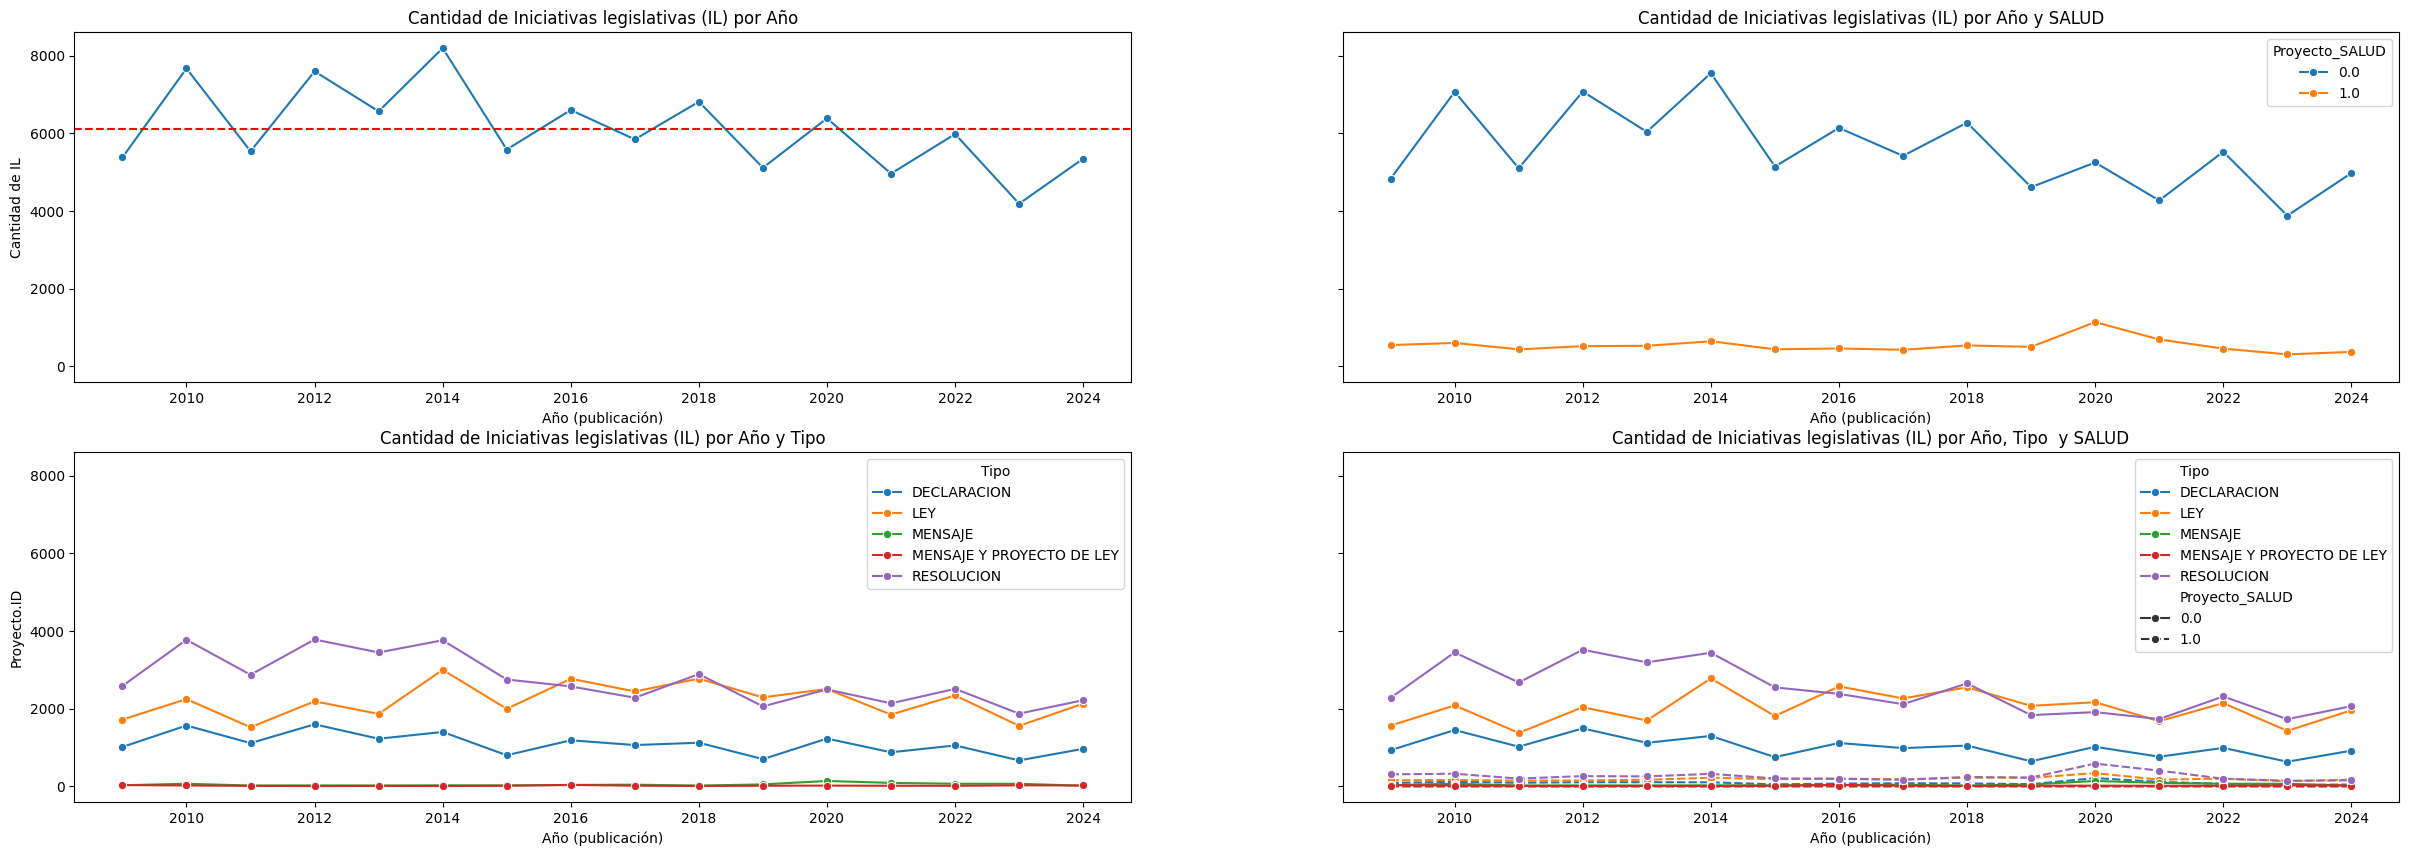

In [44]:
ano_tipo_df = pd.pivot_table(proyecto_2009_2024_df_LIMPIO, values=['Proyecto.ID'], index=['Año','Tipo','Proyecto_girado_a_comisiones_SALUD','Proyecto_SALUD','Resultado'],
                       aggfunc={'Proyecto.ID': "count"
                               }).reset_index()
f, axs = plt.subplots(2, 2, figsize=(30, 10), sharey = True)
sns.lineplot(x=ano_tipo_df['Año'], y=ano_tipo_df['Proyecto.ID'], estimator='sum', errorbar= None , linestyle='-', ax = axs[0][0], marker="o")
sns.lineplot(x=ano_tipo_df['Año'], y=ano_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Proyecto_SALUD', marker="o" ,data =ano_tipo_df,  errorbar= None , linestyle='-',ax = axs[0][1])
sns.lineplot(x=ano_tipo_df['Año'], y=ano_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Tipo', data =ano_tipo_df,  marker="o", errorbar= None , linestyle='-',ax = axs[1][0])
sns.lineplot(x=ano_tipo_df['Año'], y=ano_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Tipo', 
style="Proyecto_SALUD", data =ano_tipo_df,  errorbar= None , linestyle='-',ax = axs[1][1], marker="o")

axs[0][0].axhline(y=ano_tipo_df.groupby('Año')['Proyecto.ID'].sum().mean(), color='r', linestyle='--')
axs[0][0].set_title('Cantidad de Iniciativas legislativas (IL) por Año')
axs[0][0].set_xlabel("Año (publicación)")
axs[0][0].set_ylabel("Cantidad de IL")
axs[0][1].set_title('Cantidad de Iniciativas legislativas (IL) por Año y SALUD')
axs[0][1].set_xlabel("Año (publicación)")
axs[1][0].set_title('Cantidad de Iniciativas legislativas (IL) por Año y Tipo')
axs[1][0].set_xlabel("Año (publicación)")
axs[1][1].set_title('Cantidad de Iniciativas legislativas (IL) por Año, Tipo  y SALUD')
axs[1][1].set_xlabel("Año (publicación)")
plt.savefig("años_2009_2023.png")
plt.show()

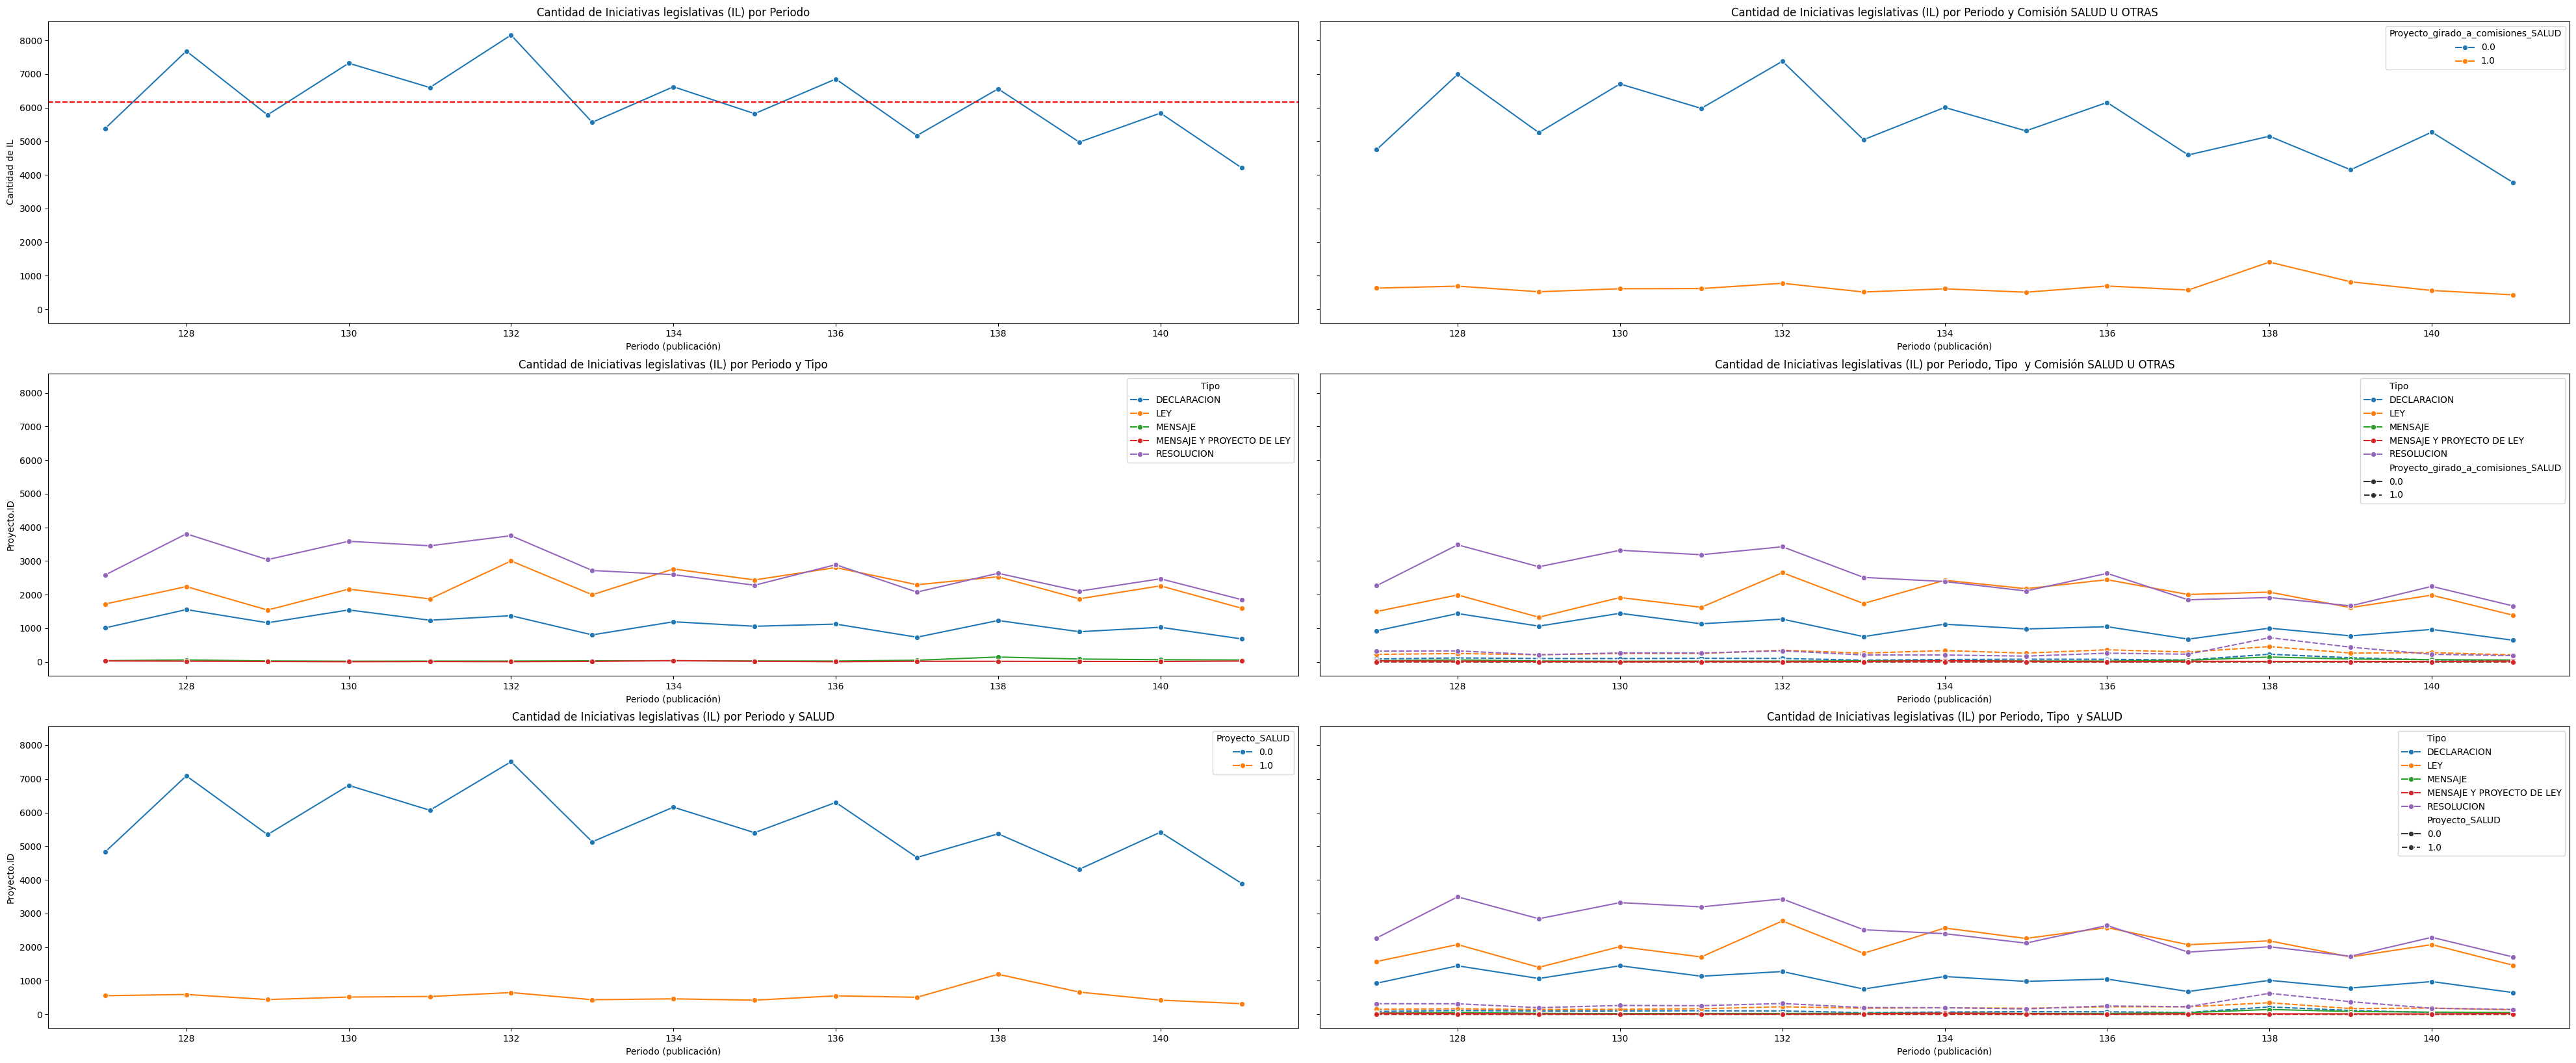

In [45]:
f, axs = plt.subplots(3, 2, figsize=(40, 20), sharey = True)
sns.lineplot(x=periodo_tipo_df['Periodo'], y=periodo_tipo_df['Proyecto.ID'], estimator='sum', errorbar= None , linestyle='-', ax = axs[0][0], marker="o")
sns.lineplot(x=periodo_tipo_df['Periodo'], y=periodo_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Proyecto_girado_a_comisiones_SALUD', marker="o" ,data =periodo_tipo_df,  errorbar= None , linestyle='-',ax = axs[0][1])
sns.lineplot(x=periodo_tipo_df['Periodo'], y=periodo_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Tipo', data =periodo_tipo_df,  marker="o", errorbar= None , linestyle='-',ax = axs[1][0])
sns.lineplot(x=periodo_tipo_df['Periodo'], y=periodo_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Tipo', 
style="Proyecto_girado_a_comisiones_SALUD", data =periodo_tipo_df,  errorbar= None , linestyle='-',ax = axs[1][1], marker="o")
sns.lineplot(x=periodo_tipo_df['Periodo'], y=periodo_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Proyecto_SALUD', marker="o" ,data =periodo_tipo_df,  errorbar= None , linestyle='-',ax = axs[2][0])
sns.lineplot(x=periodo_tipo_df['Periodo'], y=periodo_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Tipo', 
style="Proyecto_SALUD", data =periodo_tipo_df,  errorbar= None , linestyle='-',ax = axs[2][1], marker="o")


axs[0][0].axhline(y=periodo_tipo_df.groupby('Periodo')['Proyecto.ID'].sum().mean(), color='r', linestyle='--')
axs[0][0].set_title('Cantidad de Iniciativas legislativas (IL) por Periodo')
axs[0][0].set_xlabel("Periodo (publicación)")
axs[0][0].set_ylabel("Cantidad de IL")
axs[0][1].set_title('Cantidad de Iniciativas legislativas (IL) por Periodo y Comisión SALUD U OTRAS')
axs[0][1].set_xlabel("Periodo (publicación)")
axs[1][0].set_title('Cantidad de Iniciativas legislativas (IL) por Periodo y Tipo')
axs[1][0].set_xlabel("Periodo (publicación)")
axs[1][1].set_title('Cantidad de Iniciativas legislativas (IL) por Periodo, Tipo  y Comisión SALUD U OTRAS')
axs[1][1].set_xlabel("Periodo (publicación)")
axs[2][0].set_title('Cantidad de Iniciativas legislativas (IL) por Periodo y SALUD')
axs[2][0].set_xlabel("Periodo (publicación)")
axs[2][1].set_title('Cantidad de Iniciativas legislativas (IL) por Periodo, Tipo  y SALUD')
axs[2][1].set_xlabel("Periodo (publicación)")

plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.2)
plt.savefig("sesiones_2009_2023.png")
plt.show()


### IL SALUD

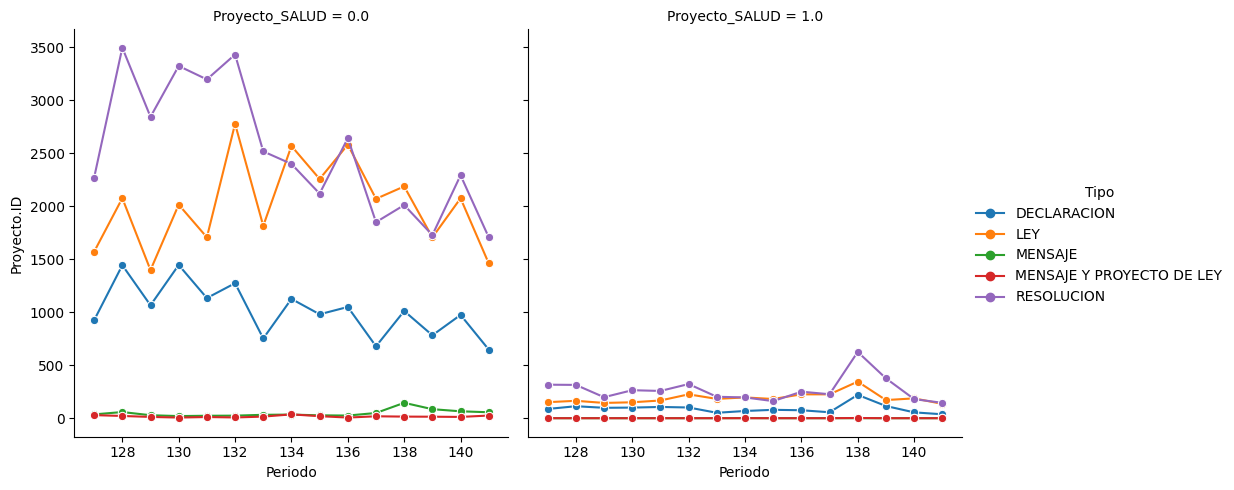

In [25]:
sns.relplot(
    data=periodo_tipo_df, x="Periodo", y="Proyecto.ID", col="Proyecto_SALUD",
    hue="Tipo",  kind="line", estimator = 'sum', errorbar= None, marker='o',
)

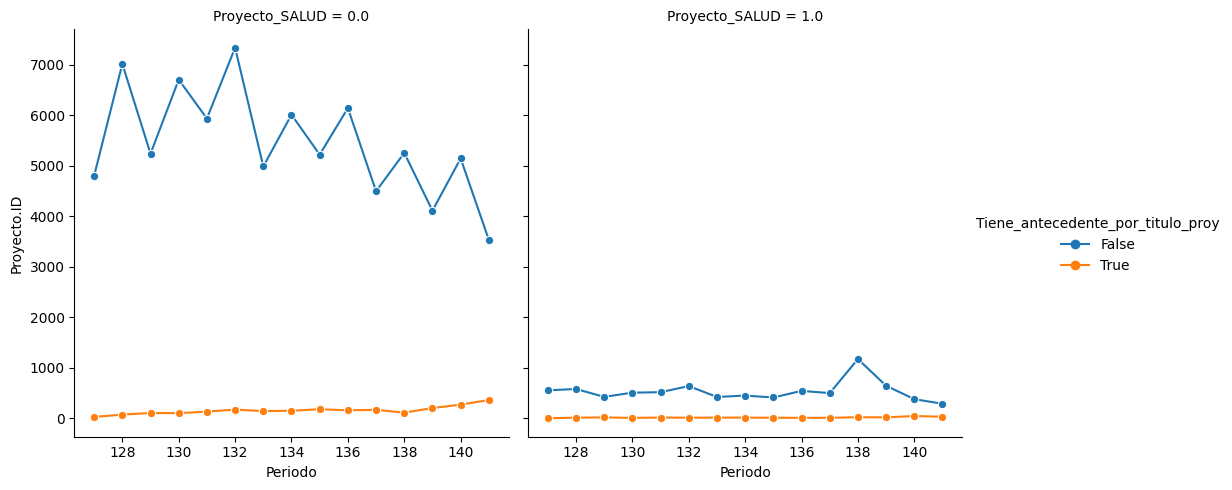

In [26]:
sns.relplot(
    data=periodo_tipo_df, x="Periodo", y="Proyecto.ID", col="Proyecto_SALUD",
    hue="Tiene_antecedente_por_titulo_proy",  kind="line", estimator = 'sum', errorbar= None, marker='o',
)

In [27]:
proyecto_2009_2024_df_LIMPIO.columns

Index(['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Exp..Diputados', 'Tipo', 'Max_Orden',
       'Proyecto_girado_a_comisiones_SALUD', 'Proyecto_SALUD', 'Resultado',
       'Tiene_info_movimiento', 'Duración_dias_prep', 'Años_mes', 'Año', 'Mes',
       'Nombre_dia_semana', 'Tiempo_desde_public_anterior',
       'Tiempo_desde_Proyecto.ID_anterior', 'ID', 'Diferencia_ID',
       'Tiene_antecedente_por_titulo_proy', 'Fecha', 'Periodo'],
      dtype='object')

In [28]:
del proyecto_2009_2024_df_LIMPIO['Fecha']

In [29]:
# Guardamos el archivo binario proyecto filtrado
with open('proyecto_2009_2024_df_LIMPIO2.pkl', 'wb') as file:
    pickle.dump(proyecto_2009_2024_df_LIMPIO,file)

In [32]:
salud_df = proyecto_2009_2024_df_LIMPIO[proyecto_2009_2024_df_LIMPIO['Proyecto_SALUD']==1]

In [34]:
salud_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Proyecto.ID,8600,8600,HCDN232030,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Título,8600,8355,EQUINOTERAPIA. REGIMEN.,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publicación.Fecha,8600,NaN,NaN,NaN,2016-12-01 13:16:51.348837376,2009-02-10 00:00:00,2013-03-12 00:00:00,2017-04-11 00:00:00,2020-08-15 00:00:00,2024-12-18 00:00:00,NaN
Publicación.ID,8600,2607,HCDN137TP001,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exp..Diputados,8600,8600,6284-D-2011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo,8600,5,RESOLUCION,4177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_Orden,8600.0,NaN,NaN,NaN,1.599651,1.0,1.0,1.0,2.0,7.0,0.818767
Proyecto_girado_a_comisiones_SALUD,8600.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Proyecto_SALUD,8600.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Resultado,8600,5,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,7909,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
periodo_tipo_df = pd.pivot_table(salud_df, values=['Proyecto.ID'], index=['Periodo','Tipo','Resultado'],
                       aggfunc={'Proyecto.ID': "count"
                                
                               }).reset_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29908\3768299550.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  periodo_tipo_df = pd.pivot_table(salud_df, values=['Proyecto.ID'], index=['Periodo','Tipo','Resultado'],


In [53]:
salud_df['Periodo'].value_counts()

Periodo
138.0    1192
139.0     662
132.0     648
128.0     591
127.0     554
136.0     550
131.0     530
130.0     514
137.0     507
134.0     461
129.0     440
133.0     435
140.0     422
135.0     421
141.0     317
Name: count, dtype: int64

In [54]:
salud_df['Periodo'].value_counts().mean()

549.6

In [55]:
periodo_tipo_df.groupby('Periodo')['Proyecto.ID'].sum().mean()

549.6

In [36]:
periodo_tipo_df

,Periodo,Tipo,Resultado,Proyecto.ID
0,127.0,DECLARACION,APROBADO,28
1,127.0,DECLARACION,MEDIA SANCION,0
2,127.0,DECLARACION,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,59
3,127.0,DECLARACION,RECHAZADO,0
4,127.0,DECLARACION,RETIRADO,0
...,...,...,...,...
520,141.0,RESOLUCION,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,145
521,141.0,RESOLUCION,RECHAZADO,0
522,141.0,RESOLUCION,RETIRADO,0
523,141.0,RESOLUCION,SANCIONADO,0


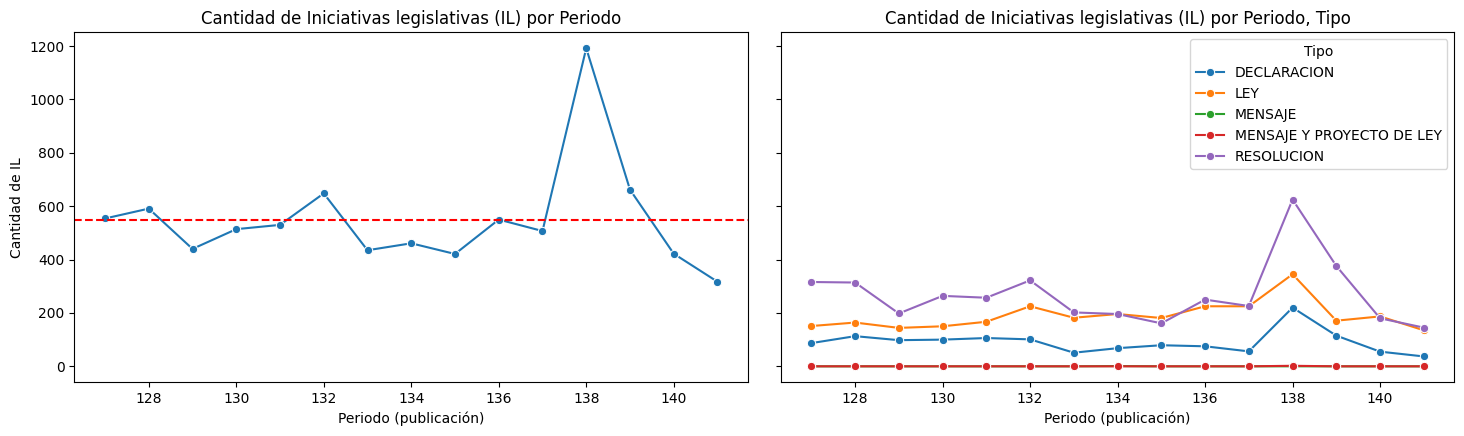

In [90]:
f, axs = plt.subplots(1, 2, figsize=(15, 5), sharey = True)
sns.color_palette("pastel")

sns.lineplot(x=periodo_tipo_df['Periodo'], y=periodo_tipo_df['Proyecto.ID'], estimator='sum', errorbar= None , linestyle='-', ax = axs[0], marker="o")
sns.lineplot(x=periodo_tipo_df['Periodo'], y=periodo_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Tipo', data =periodo_tipo_df,  marker="o", errorbar= None , linestyle='-',ax = axs[1])
axs[0].axhline(y=periodo_tipo_df.groupby('Periodo')['Proyecto.ID'].sum().mean(), color='r', linestyle='--')
axs[0].set_title('Cantidad de Iniciativas legislativas (IL) por Período')
axs[0].set_xlabel("Período (publicación)")
axs[0].set_ylabel("Cantidad de IL")
axs[1].set_title('Cantidad de Iniciativas legislativas (IL) por Período y Tipo')
axs[1].set_xlabel("Período (publicación)")
axs[1].set_title('Cantidad de Iniciativas legislativas (IL) por Período, Tipo')
axs[1].set_xlabel("Período (publicación)")


plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.2)
plt.savefig("sesiones_2009_2023_salud.png")
plt.show()



Fórmula de tasa de crecimiento anual (porcentual)

Tasa de crecimiento = ((Valor actual − Valor anterior)/ Valor anterior) × 100



In [103]:
df = salud_df['Periodo'].value_counts().reset_index()
df.head()

,Periodo,count
0,138.0,1192
1,139.0,662
2,132.0,648
3,128.0,591
4,127.0,554


In [105]:
# Ordenar por año (por si acaso)
df = df.sort_values('Periodo')

# Calcular la tasa de crecimiento porcentual año a año
df['tasa_crecimiento'] = df['count'].pct_change() * 100


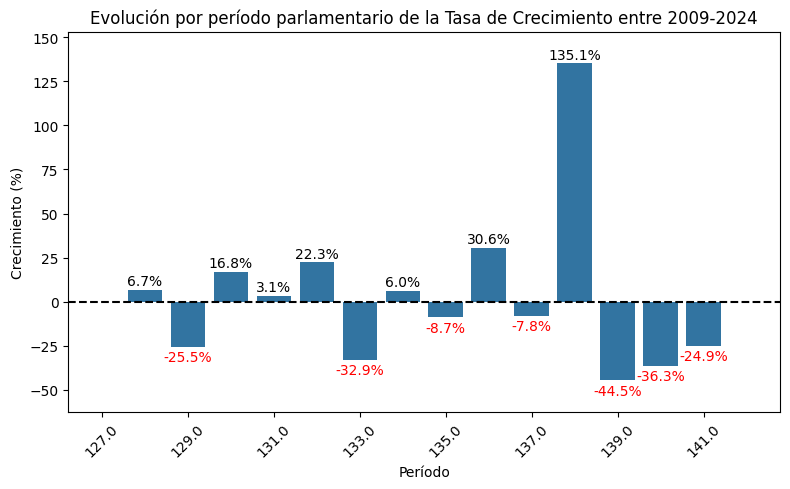

In [116]:
import matplotlib.ticker as ticker
sns.color_palette("pastel")


plt.figure(figsize=(8, 5))
#colores = ['red' if v < 0 else 'blue' for v in df['tasa_crecimiento']]

ax= sns.barplot(data=df, x='Periodo', y='tasa_crecimiento')


plt.title('Evolución por período parlamentario de la Tasa de Crecimiento entre 2009-2024')
plt.ylabel('Crecimiento (%)')
plt.xlabel('Período')
# Asegurar que el eje X muestre solo enteros
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=15))



plt.axhline(0, color='black', linestyle='--')
# Agregar etiquetas con colores
for i, v in enumerate(df['tasa_crecimiento']):
    if pd.notna(v):
        color = 'red' if v < 0 else 'black'
        offset = 1 if v >= 0 else -2  # Más espacio visual
        ax.text(i, v + offset, f'{v:.1f}%', ha='center',
                va='bottom' if v >= 0 else 'top', color=color)
        
#plt.grid(True, axis='y')

plt.xticks(rotation=45)
ax.margins(y=.1, x=.1)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.savefig("sesiones_2009_2023_salud_tasa_crecimiento.png")
plt.show()

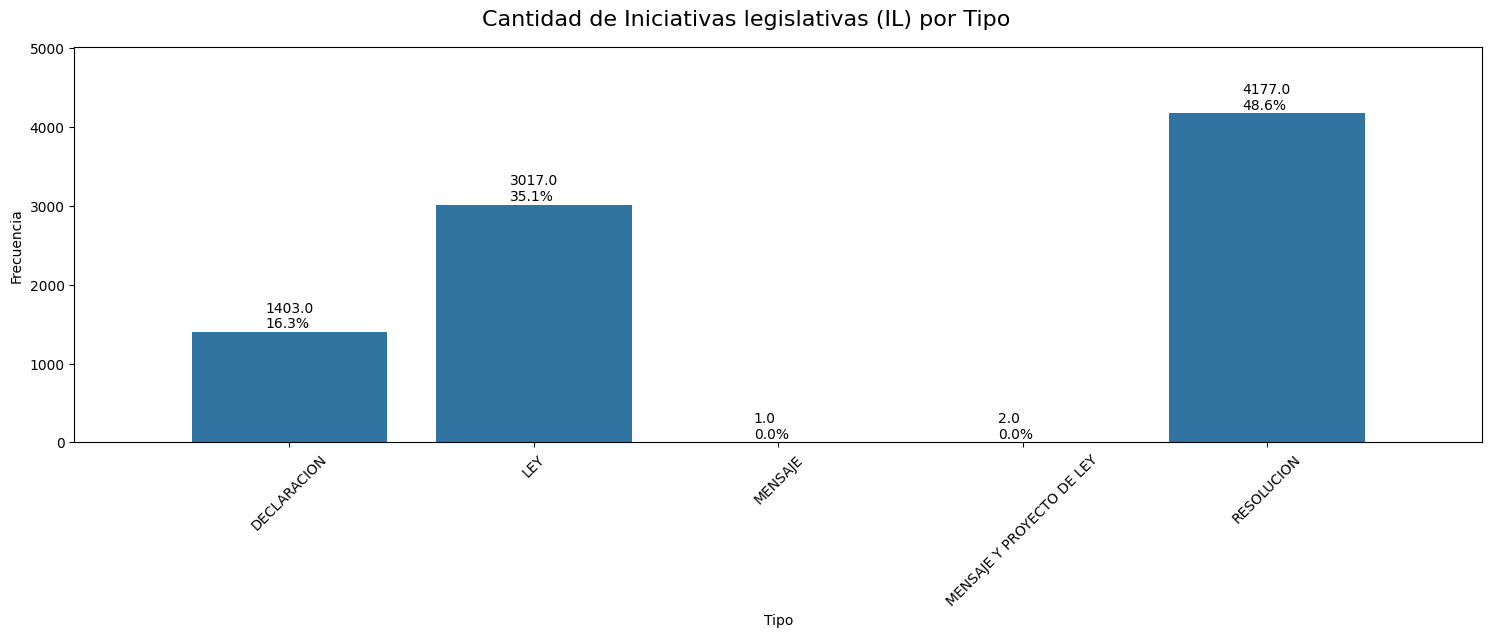

In [160]:
# Crear la figura y los subplots
total = salud_df.shape[0]
col = 'Tipo'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
fig.suptitle('Cantidad de Iniciativas legislativas (IL) por Tipo', fontsize=16)

sns.countplot(x=col, data=salud_df, ax = ax, stat = 'count', orient='v') # {‘count’, ‘percent’, ‘proportion’, ‘probability’} #  palette='colorblind',

ax.set_ylabel('Frecuencia')
ax.set_xlabel(col)#

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = (p.get_x() + p.get_width() / 2 )- 0.1 
    y = p.get_y() + p.get_height() 
    ax.annotate(percentage, (x, y+50))
    ax.annotate(p.get_height(), (x, y +250))
  

plt.tight_layout(pad=1)
plt.xticks(rotation=45)
ax.margins(y=.2, x=.1)

plt.savefig("2009_2023_salud_tipo.png")

plt.show()

Para ver informes 
* https://www4.hcdn.gob.ar/archivos/genero/archivos/informe_proyectos_tipo_comision_2022.pdf
* https://www4.hcdn.gob.ar/archivos/genero/archivos/infomujlgbt.pdf